Datasets seleccionados:
    Se ha determido analizar 2 (dos), datasets para realizar el ETL, EDA y así posteriormente disponibilizar estos datos con la finalidad de realizar el dasbhoard y observar detalladamente los datos, como así tambien en forma interctivo.

EDA explorando y analizando los datos de Internet_BAF.csv.

In [24]:
import pandas as pd
# Carga el archivo CSV en un DataFrame
df_csv = pd.read_csv('Internet_BAF.csv')


Visualización de las primeras filas del DataFrame, se aclara que Capital Federal se analiza como una provincia más ya que es una Ciudad Autónoma con su propio Jefe de Gobierno, debido a la cantidad de Habitantes:

In [21]:
print(df_csv.head())


    Año  Trimestre        Provincia  Banda ancha fija  Dial up  Total
0  2022          4     Buenos Aires                 5      6.0      5
1  2022          4  Capital Federal                 2      2.0      2
2  2022          4        Catamarca                71      1.0     71
3  2022          4            Chaco               144      5.0    144
4  2022          4           Chubut               168    904.0    169


Resumen estadístico de las columnas numéricas:

In [22]:
print(df_csv.describe())


               Año   Trimestre  Banda ancha fija     Dial up       Total
count   864.000000  864.000000        864.000000  862.000000  864.000000
mean   2018.000000    2.500000        137.326389  150.595128  137.636574
std       2.583484    1.118682        180.812265  230.167337  180.798813
min    2014.000000    1.000000          1.000000    0.000000    1.000000
25%    2016.000000    1.750000         39.000000    2.000000   39.750000
50%    2018.000000    2.500000         90.500000   16.000000   91.000000
75%    2020.000000    3.250000        143.000000  253.500000  143.250000
max    2022.000000    4.000000        987.000000  998.000000  987.000000


Información sobre las columnas, incluyendo tipos de datos y valores nulos:

In [23]:
print(df_csv.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               864 non-null    int64  
 1   Trimestre         864 non-null    int64  
 2   Provincia         864 non-null    object 
 3   Banda ancha fija  864 non-null    int64  
 4   Dial up           862 non-null    float64
 5   Total             864 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 40.6+ KB
None


Visualización de gráficos para explorar distribuciones, relaciones y patrones en los datos. 

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


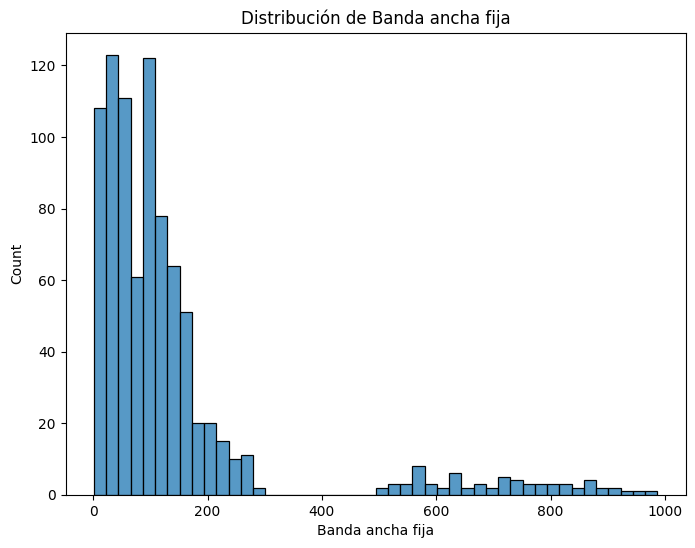

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# histograma para la columna "Banda ancha fija"
plt.figure(figsize=(8, 6))
sns.histplot(data=df_csv, x='Banda ancha fija')
plt.xlabel('Banda ancha fija')
plt.title('Distribución de Banda ancha fija')
plt.show()



Eje X (Banda ancha fija): El rango de valores de "Banda ancha fija" se extiende de 0 a 1000. Esto significa que se está considerando una amplia gama de valores de velocidad de banda ancha fija en los datos. El eje x muestra cómo se distribuyen estas velocidades dentro de ese rango.

Eje Y (Recuento): El eje y muestra el recuento de observaciones en cada intervalo de velocidad de banda ancha fija. En este caso, el eje y representa cuántas veces se observó una velocidad de banda ancha fija en un cierto rango.

Rango de interés (0 a 120): está relacionado con velocidades específicas de banda ancha fija que se encuentran en ese rango. Velocidades de banda ancha fija más lentas, en megabits por segundo (Mbps), que son comunes en ciertas áreas o para ciertos proveedores de servicios de Internet.

Interpretación: Para interpretar el histograma, se puede observar cómo se distribuyen las velocidades de banda ancha fija en relación con el rango de 0 a 120 en el eje x. El histograma muestra una concentración significativa de observaciones en ese rango,  muchas velocidades de banda ancha fija caen en ese intervalo específico.

En general, un histograma como este te permite comprender la distribución de las velocidades de banda ancha fija en los datos y cómo se agrupan o dispersan dentro de un rango particular. Se podría usar esta información para tomar decisiones relacionadas con la banda ancha fija, como identificar áreas con velocidades más bajas o comparar proveedores de servicios de Internet.







Manipulación y limpieza de datos, como el manejo de valores nulos o duplicados.

In [26]:
# Identificar valores nulos en el DataFrame
df_csv.isna()


,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
859,False,False,False,False,False,False
860,False,False,False,False,False,False
861,False,False,False,False,False,False
862,False,False,False,False,False,False


In [27]:
# Contar valores nulos por columna
df.isna().sum()


status          0
description     0
fLength         0
fType           0
fDescription    0
dtype: int64

No se observaron valores nulos.

Se explora la correlación entre variables, se realiza pruebas estadísticas.

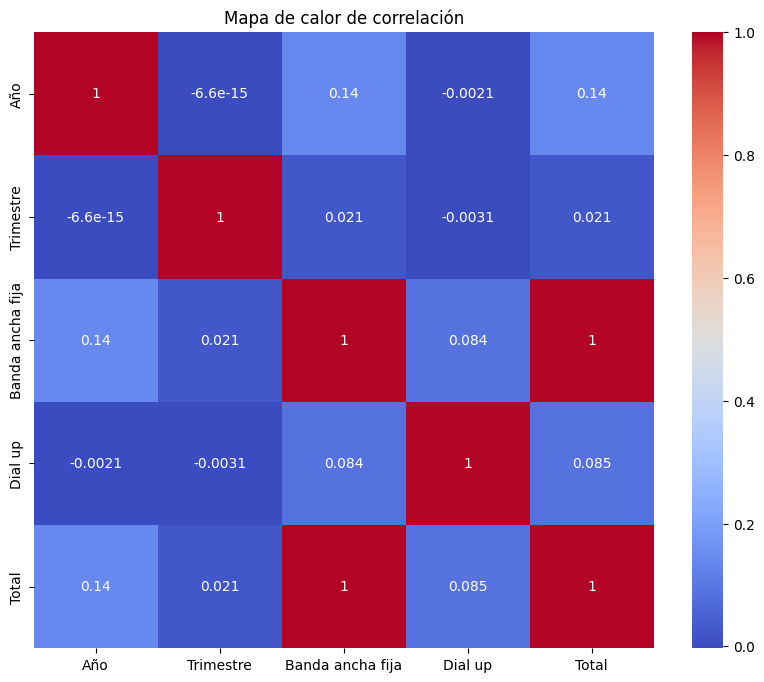

In [29]:
# Selecciona solo las columnas numéricas para el cálculo de la matriz de correlación
columnas_numericas = df_csv.select_dtypes(include=['int64', 'float64'])

# Calcula la matriz de correlación
correlation_matrix = columnas_numericas.corr()

# Crea un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Mapa de calor de correlación")
plt.show()


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


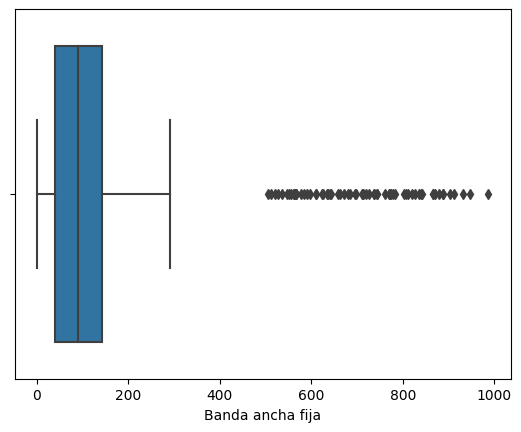

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# boxplot para una columna numérica
sns.boxplot(x=df_csv['Banda ancha fija'])
plt.show()


Se aclara que tanto en las columnas Banda ancha fija, como así también en la columna Dial up, no se detectaron datos atípicos.
No se observan puntos individuales por encima del bigote superior del boxplot,como así tampoco se observan puntos individuales por debajo del bigote inferior.

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


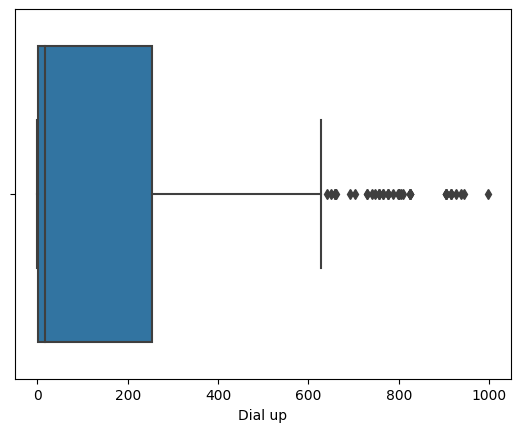

In [33]:
sns.boxplot(x=df_csv['Dial up'])
plt.show()

Elimino la columna Total de mi Dataset y agrego otra de nombre TotalBA, ya que verificando visualmente y calculando en forma aleatorio el conteo del mismo no coincide en varias filas, como por ejemplo en el conteo de las conexiones de la Provincia de Buenos Aires da como resultado 5 y como Total de conxiones tendría que ser 11, asimismo la fila de Catamarca tendría que ser 72 y da como resultado 71. 

In [25]:
# Primero, calcula la suma de las columnas mencionadas y guárdala en una nueva columna 'TConexiones'
df_csv['Total_BA'] = df_csv['Banda ancha fija'] + df_csv['Dial up'] 

# Ahora, elimina la columna 'Total' utilizando el método drop
df_csv = df_csv.drop(columns=['Total'])

# se reordena las columnas para tener 'TConexiones' al final.
column_order = ['Año', 'Trimestre', 'Provincia', 'Banda ancha fija', 'Dial up','Total_BA']
df_csv = df_csv[column_order]


# Ahora, el DataFrame df_csv tiene la nueva columna 'Total_BA' y la columna 'Total' ha sido eliminada.

In [26]:
print(df_csv.head())

    Año  Trimestre        Provincia  Banda ancha fija  Dial up  Total_BA
0  2022          4     Buenos Aires                 5      6.0      11.0
1  2022          4  Capital Federal                 2      2.0       4.0
2  2022          4        Catamarca                71      1.0      72.0
3  2022          4            Chaco               144      5.0     149.0
4  2022          4           Chubut               168    904.0    1072.0


Convierto las columnas con datos float a Int.

In [27]:
# Eliminar filas con valores no finitos
df_csv = df_csv.dropna()  # Elimina filas con NaN
df_csv = df_csv.replace([float('inf'), float('-inf')], pd.NA)  # Reemplaza infinitos por NA

# Convertir las columnas de float64 a int
df_csv['Dial up'] = df_csv['Dial up'].astype(int)
df_csv['Total_BA'] = df_csv['Total_BA'].astype(int)

# Mostrar el DataFrame después de la conversión
print(df_csv)



      Año  Trimestre            Provincia  Banda ancha fija  Dial up  Total_BA
0    2022          4         Buenos Aires                 5        6        11
1    2022          4      Capital Federal                 2        2         4
2    2022          4            Catamarca                71        1        72
3    2022          4                Chaco               144        5       149
4    2022          4               Chubut               168      904      1072
..    ...        ...                  ...               ...      ...       ...
859  2014          1           Santa Cruz                26      460       486
860  2014          1             Santa Fe               506      612      1118
861  2014          1  Santiago Del Estero                37        9        46
862  2014          1     Tierra Del Fuego                27      766       793
863  2014          1              Tucumán               130       88       218

[862 rows x 6 columns]


In [28]:
print(df_csv.info())

<class 'pandas.core.frame.DataFrame'>
Index: 862 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               862 non-null    int64 
 1   Trimestre         862 non-null    int64 
 2   Provincia         862 non-null    object
 3   Banda ancha fija  862 non-null    int64 
 4   Dial up           862 non-null    int32 
 5   Total_BA          862 non-null    int32 
dtypes: int32(2), int64(3), object(1)
memory usage: 40.4+ KB
None


Cargo los datos a un nuevo archivo .csv

In [29]:
InternetBA = 'InternetBA.csv'
df_csv.to_csv(InternetBA, index=False)

Se carga una nueva base de datos correspondiente al acceso a internet por tecnología cada 100 hogares por provincia, para realizar otro EDA, ya que me servirá para realizar otro análisis y posterior exposición.

In [34]:
df_tecno = pd.read_csv('Internet_Accesos-por-tecnologia.csv')

Visualización de las primeras filas del DataFrame:

In [35]:
print(df_tecno.head())

    Año Trimestre        Provincia  ADSL  Cablemodem  Fibra óptica  Wireless  \
0  2022         4     Buenos Aires   326           3             1       130   
1  2022         4  Capital Federal   139           1           139         5   
2  2022         4        Catamarca     9          11            47         1   
3  2022         4            Chaco    25          61            47         8   
4  2022         4           Chubut    45          74            10        31   

   Otros  Total  
0     72      5  
1     32      2  
2      2     71  
3      3    144  
4      9    169  


Información sobre las columnas, incluyendo tipos de datos y valores nulos:

In [37]:
print(df_tecno.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           864 non-null    object
 1   Trimestre     864 non-null    object
 2   Provincia     864 non-null    object
 3   ADSL          864 non-null    int64 
 4   Cablemodem    864 non-null    int64 
 5   Fibra óptica  864 non-null    int64 
 6   Wireless      864 non-null    int64 
 7   Otros         864 non-null    int64 
 8   Total         864 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 60.9+ KB
None


Visualización de gráficos para explorar distribuciones, relaciones y patrones en los datos. 

Distribución de diferentes tecnologías a lo largo del tiempo utilizando gráficos de barras apiladas, se utiliza la biblioteca Seaborn.

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

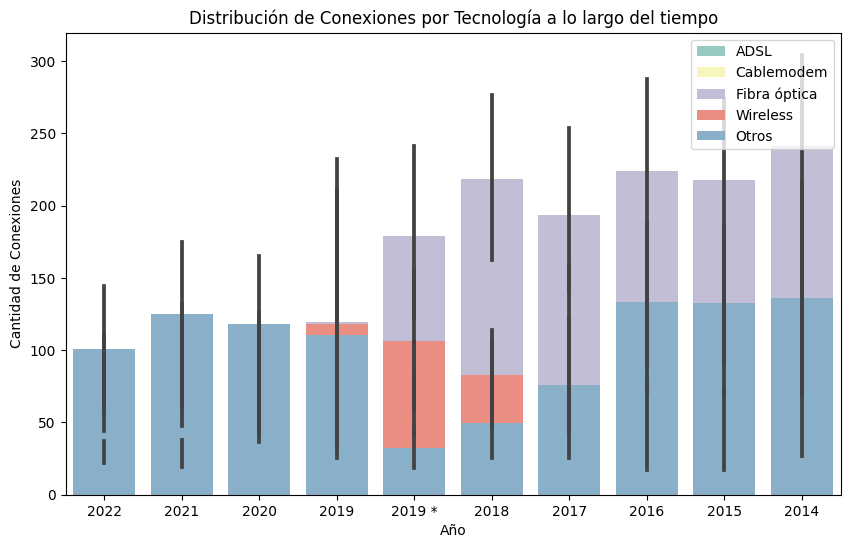

In [41]:
# Configura un color palette
colors = sns.color_palette('Set3')

# Crea un gráfico de barras apiladas
plt.figure(figsize=(10, 6))
sns.barplot(x='Año', y='ADSL', data=df_tecno, color=colors[0], label='ADSL')
sns.barplot(x='Año', y='Cablemodem', data=df_tecno, color=colors[1], label='Cablemodem')
sns.barplot(x='Año', y='Fibra óptica', data=df_tecno, color=colors[2], label='Fibra óptica')
sns.barplot(x='Año', y='Wireless', data=df_tecno, color=colors[3], label='Wireless')
sns.barplot(x='Año', y='Otros', data=df_tecno, color=colors[4], label='Otros')

plt.xlabel('Año')
plt.ylabel('Cantidad de Conexiones')
plt.title('Distribución de Conexiones por Tecnología a lo largo del tiempo')
plt.legend(loc='upper right')

plt.show()


Elimino la columna Total de mi Dataset y agrego otra de nombre TConexiones, ya que verificando visualmente y calculando en forma aleatorio el conteo del mismo no coincide en varias filas, como por ejemplo en el conteo de las conexiones de la Provincia de Buenos Aires da como resultado 5 y como Total de conxiones tendría que ser 532, asimismo la fila de Catamarca tendría que ser 70 y da como resultado 71. 

In [42]:

# Primero, calcula la suma de las columnas mencionadas y guárdala en una nueva columna 'TConexiones'
df_tecno['TConexiones'] = df_tecno['ADSL'] + df_tecno['Cablemodem'] + df_tecno['Fibra óptica'] + df_tecno['Wireless'] + df_tecno['Otros']

# Ahora, elimina la columna 'Total' utilizando el método drop
df_tecno = df_tecno.drop(columns=['Total'])

# se reordena las columnas para tener 'TConexiones' al final.
column_order = ['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'TConexiones']
df_tecno = df_tecno[column_order]

# Ahora, el DataFrame df_tecno tiene la nueva columna 'TConexiones' y la columna 'Total' ha sido eliminada.


In [43]:
print(df_tecno.head())

    Año Trimestre        Provincia  ADSL  Cablemodem  Fibra óptica  Wireless  \
0  2022         4     Buenos Aires   326           3             1       130   
1  2022         4  Capital Federal   139           1           139         5   
2  2022         4        Catamarca     9          11            47         1   
3  2022         4            Chaco    25          61            47         8   
4  2022         4           Chubut    45          74            10        31   

   Otros  TConexiones  
0     72          532  
1     32          316  
2      2           70  
3      3          144  
4      9          169  


Una vez verificado los resultados de la nueva columna, exportamos el df a un nuevo csv, para su posterior análisis.

In [47]:
nuevo_acc_Tecno_csv = 'nuevo_acc_Tecno.csv'
df_tecno.to_csv(nuevo_acc_Tecno_csv, index=False)


In [31]:
df_tecno2 = pd.read_csv('nuevo_acc_Tecno.csv')

Visualización de gráficos para explorar distribuciones, relaciones y patrones en los datos. 

Distribución  Total a lo largo del tiempo, utilizando gráficos de barras apiladas, se utiliza la biblioteca Seaborn, se observa la mayor cantidad de conexiones sumando todas las tecnologías a lo largo del tiempo ( 2014 al 2022), en las Provincias de Córdoba y San Juan, seguidas de Capital Federal y Santa Fe.

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

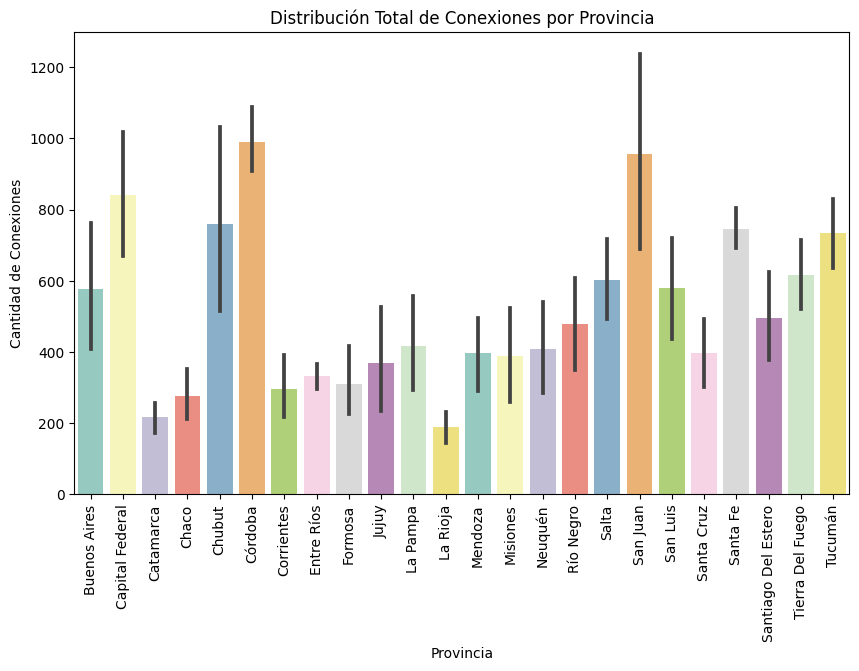

In [52]:
# Configura un color palette
colors = sns.color_palette('Set3')

# Crea un gráfico de barras apiladas
plt.figure(figsize=(10, 6))
sns.barplot(x='Provincia', y='TConexiones', data=df_tecno2, palette=colors)

plt.xlabel('Provincia')
plt.ylabel('Cantidad de Conexiones')
plt.title('Distribución Total de Conexiones por Provincia')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=90)

plt.show()


In [46]:
print(df_tecno2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           864 non-null    object
 1   Trimestre     864 non-null    object
 2   Provincia     864 non-null    object
 3   ADSL          864 non-null    object
 4   Cablemodem    864 non-null    object
 5   Fibra óptica  864 non-null    object
 6   Wireless      864 non-null    object
 7   Otros         864 non-null    object
 8   TConexiones   864 non-null    object
dtypes: object(9)
memory usage: 60.9+ KB
None


In [37]:
print(df_tecno2)

      Año Trimestre            Provincia  ADSL  Cablemodem  Fibra óptica  \
0    2022         4         Buenos Aires   326           3             1   
1    2022         4      Capital Federal   139           1           139   
2    2022         4            Catamarca     9          11            47   
3    2022         4                Chaco    25          61            47   
4    2022         4               Chubut    45          74            10   
..    ...       ...                  ...   ...         ...           ...   
859  2014         1           Santa Cruz    19         100           381   
860  2014         1             Santa Fe   323         174             3   
861  2014         1  Santiago Del Estero    33           4            19   
862  2014         1     Tierra Del Fuego    22           3           648   
863  2014         1              Tucumán   130          83           121   

     Wireless  Otros  TConexiones  
0         130     72          532  
1           5  

He detectado que varias filas, poseía (* y espacios en blanco), lo cual me dificulta al cargar en Power Bi, por lo cual decidí eliminarlos de mi dataset.

In [43]:
# Definir una función para eliminar asteriscos y espacios en blanco de una cadena
def limpiar_celda(celda):
    # Reemplazar asteriscos y eliminar espacios en blanco
    return str(celda).replace('*', '').strip()

# Aplicar la función a todas las celdas del DataFrame
df_tecno2 = df_tecno2.applymap(limpiar_celda)

# Mostrar el DataFrame después del reemplazo
print(df_tecno2)

      Año Trimestre            Provincia ADSL Cablemodem Fibra óptica  \
0    2022         4         Buenos Aires  326          3            1   
1    2022         4      Capital Federal  139          1          139   
2    2022         4            Catamarca    9         11           47   
3    2022         4                Chaco   25         61           47   
4    2022         4               Chubut   45         74           10   
..    ...       ...                  ...  ...        ...          ...   
859  2014         1           Santa Cruz   19        100          381   
860  2014         1             Santa Fe  323        174            3   
861  2014         1  Santiago Del Estero   33          4           19   
862  2014         1     Tierra Del Fuego   22          3          648   
863  2014         1              Tucumán  130         83          121   

    Wireless Otros TConexiones  
0        130    72         532  
1          5    32         316  
2          1     2      

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9660\99883894.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_tecno2 = df_tecno2.applymap(limpiar_celda)


Una vez eliminado los *, reemplace mi archivo.csv.

In [44]:
nuevo_acc_Tecno_csv = 'nuevo_acc_Tecno.csv'
df_tecno2.to_csv(nuevo_acc_Tecno_csv, index=False)

In [47]:

# Assuming you have your DataFrame df_tecno2
df_tecno2['TConexiones'] = pd.to_numeric(df_tecno2['TConexiones'], errors='coerce')
df_tecno2['Nuevo_Acceso'] = df_tecno2['TConexiones'] * 1.02

# Display the DataFrame
print(df_tecno2)


      Año Trimestre            Provincia ADSL Cablemodem Fibra óptica  \
0    2022         4         Buenos Aires  326          3            1   
1    2022         4      Capital Federal  139          1          139   
2    2022         4            Catamarca    9         11           47   
3    2022         4                Chaco   25         61           47   
4    2022         4               Chubut   45         74           10   
..    ...       ...                  ...  ...        ...          ...   
859  2014         1           Santa Cruz   19        100          381   
860  2014         1             Santa Fe  323        174            3   
861  2014         1  Santiago Del Estero   33          4           19   
862  2014         1     Tierra Del Fuego   22          3          648   
863  2014         1              Tucumán  130         83          121   

    Wireless Otros  TConexiones  Nuevo_Acceso  
0        130    72          532        542.64  
1          5    32         

In [48]:

# Crear un DataFrame para los ejes de tendencia y destino
df_tendencia_destino = df_tecno2[['Año', 'Trimestre', 'Nuevo_Acceso']]

# Crear un DataFrame para los campos de objetivo del KPI
df_objetivo_kpi = df_tecno2[['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'TConexiones']]

# Mostrar el DataFrame para los ejes de tendencia y destino
print("DataFrame para ejes de tendencia y destino:")
print(df_tendencia_destino)

# Mostrar el DataFrame para los campos de objetivo del KPI
print("\nDataFrame para campos de objetivo del KPI:")
print(df_objetivo_kpi)


DataFrame para ejes de tendencia y destino:
      Año Trimestre  Nuevo_Acceso
0    2022         4        542.64
1    2022         4        322.32
2    2022         4         71.40
3    2022         4        146.88
4    2022         4        172.38
..    ...       ...           ...
859  2014         1        517.14
860  2014         1       1173.00
861  2014         1       1025.10
862  2014         1        690.54
863  2014         1        453.90

[864 rows x 3 columns]

DataFrame para campos de objetivo del KPI:
      Año Trimestre            Provincia ADSL Cablemodem Fibra óptica  \
0    2022         4         Buenos Aires  326          3            1   
1    2022         4      Capital Federal  139          1          139   
2    2022         4            Catamarca    9         11           47   
3    2022         4                Chaco   25         61           47   
4    2022         4               Chubut   45         74           10   
..    ...       ...                  ...  

In [49]:
tendencia_destino = 'Tendencia_Destino.csv'
df_tendencia_destino.to_csv(tendencia_destino, index=False)

In [ ]:
objetivo_kpi = 'Objetivo_kpi.csv'
df_objetivo_kpi.to_csv(objetivo_kpi, index=False)

Finalmente, con todos los análisis y ETL mis dataset quedaron personalizados para trabajarlo con el dasbohard en Power Bi y de esta manera pasar a la otra instancia de mi informe. Debo aclarar que de todos los desgloses de mis datasets, probablemente seleccione sólo algunos, que me represente la totalidad de mis requerimientos en los kpis a desarrollar.  